### Can We Track Pro-Ukrainian Sentiment Through Tweets?

**Michelle Kearney**

#### Executive Summary

On February 24, 2022, Russian invaded Ukraine. Ukraine is completely dependent on foreign assistance for humanitarian, financial and military needs. Continued foreign aid is related to public support for their efforts in the war. Social media provides open source data on public opinion. This project explores the potential of using tweets to track public sentiment. A dataset provided by Daria Purtova on Kaggle was used for this project. It included tweets compiled between January 1, 2022 through March 6, 2022 that included one of eight search phrases related to the Russian-Ukrainian war. Tweets were classified by sentiment as either Pro-Ukraine or other using the TextBlob library. Once texts were classified, classification models using logistic regression, k-nearest neighbors and decision trees were compared to build an optimum model to classify text. Preliminary results suggest that the TextBlob library may be limited in its ability to classify tweets as Pro-Ukraine or not. The K-nearest neighbors model performed slight better than the other two models. Continued work will focus on improving the sentiment analysis of texts, building additional classification models using Support Vector Machines and Naive Bayes, and improving models through feature engineering.

#### Rationale

On February 24, 2022, Russia invaded Ukraine. This led to the largest refugee and humanitarian crisis within Europe since the Yugoslav Wars in the 1990s. According to a report by the [Council on Foreign Relations](https://www.cfr.org/article/how-much-aid-has-us-sent-ukraine-here-are-six-charts), forty-seven countries have provided military aid to Ukraine. The U.S. alone has directed more than \\$75 billion in assistance for humanitarian, financial, and military support. Ukraine expects a \\$38 billion budget deficit this year and the Ukrainian government is requesting an additional \$14 billion in foreign aid for rapid reconstruction of critical infrastructure [(Reuters).](https://www.reuters.com/world/europe/ukraine-says-its-received-167-bln-foreign-aid-this-year-2023-05-11/). Continued foreign aid is heavily dependent on public support for Ukraine. 

#### Research Question

Social media provides a plethora of open source data on public opinion. The goal of this project is to determine if we can track public sentiment for Ukraine through tweets.

#### Data Sources

The dataset used for this project comes from Daria Purtova on [Kaggle.](https://www.kaggle.com/datasets/foklacu/ukraine-war-tweets-dataset-65-days) Purtova compiled tweets between January 1, 2022 to March 6, 2022. She searched on the following phrases and compiled results into 8 separate CSV files based on the search phrases.

* ukraine war
* ukraine troops
* ukraine border
* ukraine NATO
* StandWithUkraine
* russian troops
* russian border ukraine
* russia invade

Each file consisted of 29 features. Some of the columns were identifiers, not unique, redundant or not populated enough to be useful. Nine of the features were useful for this study. They include the following:

* **Date** - the date the tweet was posted (object)
* **Content** - the text of the tweet (object)
* **replyCount** - the number of replies to the tweet (int64)
* **retweetCount** - the number of times the tweet was retweeted (int64)
* **likeCount** - the number of times the tweet was liked (int64)
* **quoteCount** - the number of times the tweet was quoted (int64)
* **SourceLabel** - the type of app from which the tweet was sent (e.g. iPhone, Android, Web app) (object)
* **hashtags** - hashtags included in the text
* **Searh** - the search phrase used to compile the text

The language of the text was one of the features, but only English texts were used for this study. To save on computational time, 7000 tweets were randomnly selected from each of the 8 CSV files to make the final dataset.

#### Methodology

A binary classification will be created for each text as either Pro-Ukraine (positive) or other, either Anti-Ukraine or neutral (negative). We will use the TextBlob library to assign a sentiment to each text. 

Once texts are assigned a sentiment, we will compare classification models such as logistic regression, K-nearest neighbors and decision trees to build an optimum model to calssify texts.

#### Results

Figure 1 shows the results of the sentiment analysis using the TextBlob library. 31% of the tweets were classified as pro-Ukraine. 

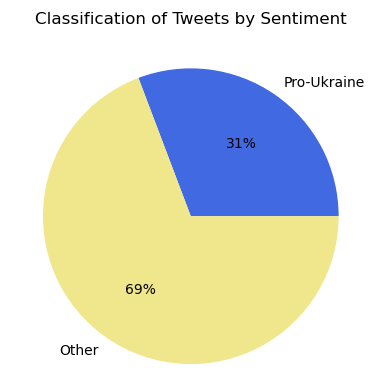

Currently, we have not verified how well the sentiment analysis performed. Sentiment analysis on five tweets is shown below. The fourth tweet 'what a sad day i m with ukraine i stand with...' is clearly pro-Ukrainian but was classified as negative or not pro-Ukrainian.

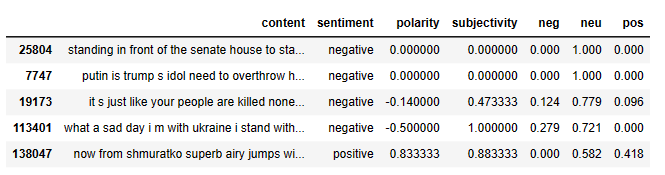

The TextBlob library appears to be classifying positive texts using words like 'suberb,' as in the fifth text. Positive phrases that might be appear in a restaurant review for example, are not necessarily the same words that would show support for Ukraine. This suggests the sentiment analysis was not effective.

Figure 2 shows the breakdown of pro-Ukrainian Tweets by search phrase. We would expect tweets with the phrase "StandWithUkraine" to be pro-Ukrainian. These tweets comprise the highest percentage of pro tweets, which suggests that the sentiment analysis may have been effective.

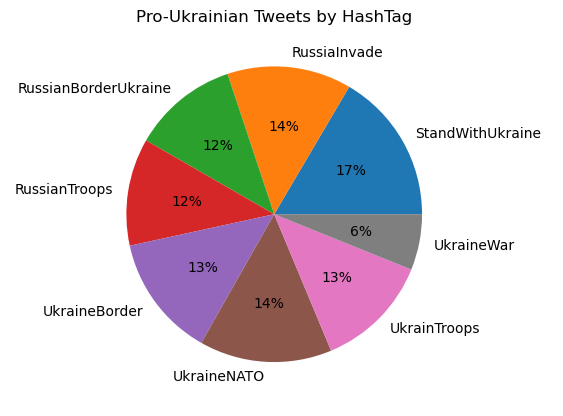

Classification models were built once the texts were classified by sentiment. The following table shows preliminary results of the models. The baseline model is 68.83% accurate. The K-Nearest Neighbors model slightly outperformed the other models.

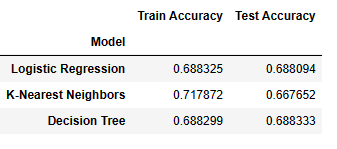

#### Next Steps

* Research other methods to perform sentiment analysis.
* Apply Natural Language Processing methods to incorporate the hashtag feature into models.
* Compare results with Support Vector Machine and Naive-Bayes models.
* Continue fine-tuning classification models by feature engineering.

#### Outline of Project

An overview of the analysis can be found with the notebook [Ukraine Tweets Analysis](https://github.com/chellykearney/BerkeleyAI_ML_Capstone/blob/main/Ukraine%20Tweet%20Analysis.ipynb)

##### Contact and Further Information

None at this time.